# SENTIMENT ANALYSIS SCIKIT-LEARN ON MOVIE REVIEWS

![SegmentLocal](sentiment.png "segment")

This notebook was developed following this tutorial on scikit-learn.org: http://scikit-learn.org/dev/tutorial/text_analytics/working_with_text_data.html

However, it was adapted for movie review corpus, downloadable [here](https://www.nltk.org/nltk_data/) using the NLTK's tokenizer (so symbols and stopwords are not thrown out)

In [2]:
import sklearn
from sklearn.datasets import load_files

In [16]:
moviedir = r'movie_reviews'

# loading all files from folder
movie = load_files(moviedir, shuffle=True)

In [4]:
len(movie.data)

2000

In [5]:
# target names ("classes") are automatically generated from subfolder names
movie.target_names

['neg', 'pos']

In [6]:
# First file seems to be about a Schwarzenegger movie. 
movie.data[0][:500]

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so cal"

In [7]:
movie.filenames[0]

'movie_reviews\\neg\\cv405_21868.txt'

# Split in train e test set

In [43]:
import numpy as np
movie.target = np.array([movie.target_names[x] for x in movie.target]) # change targets from 0,1 to their original labels neg,pos

In [45]:
from sklearn.model_selection import train_test_split

docs_train, docs_test, y_train, y_test = train_test_split(movie.data, movie.target, 
                                                          test_size = 0.20, random_state = 42)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
tfidfvec = TfidfVectorizer(tokenizer=nltk.word_tokenize) # use the tokenizer from the nltk library

# Fit and transform for both train and test
docs_tfidf_train = tfidfvec.fit_transform(docs_train)
docs_tfidf_test = tfidfvec.transform(docs_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [48]:
print(docs_tfidf_train.shape)
print(docs_tfidf_test.shape)

(1600, 41912)
(400, 41912)


In [49]:
# 'screen' is found in the corpus, mapped to index 32383
print(tfidfvec.vocabulary_.get('screen'))
print(tfidfvec.vocabulary_.get('yellowstone'))

32570
41666


In [50]:
print(docs_train[0])
print(docs_tfidf_train[0].toarray()[0][32383]) ## check if screen is in the first train sentence and what is the TF-IDF value
print(docs_tfidf_train[0].toarray()[0][41508]) ## check if yellowstone is in the first train sentence and what is the TF-IDF value

b'i rented " brokedown palace " last night blind , having heard nothing about it beforehand , and i enjoyed it immensely despite some flaws . \nfor anyone wishing to have the same experience i would suggest reserving judgement of the movie until viewing it in its entirety . \nthat is no easy task . \nsuperficially , it bears an unfortunate ( and not necessarily unintended ) resemblance to several other movies , notably " return to paradise " and " midnight express . " \nas a result nearly every review of " brokedown palace " i subsequently read became hopelessly entangled in making the obvious comparisons . \nthe consequence was nearly universal condemnation , which is a shame as this is a fine film . \nfor those who have yet to view the movie , let me say that it is not an attempt to portray the nightmarish reality of the third world criminal justice system ( as was " midnight express " ) nor completely the moral dilemma and examination of the meaning of friendship and humanity that w

## Train Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
clf = MultinomialNB().fit(docs_tfidf_train, y_train)

In [53]:
y_pred = clf.predict(docs_tfidf_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.76

### Calculate Metrics and confusion matrix

In [54]:
from sklearn import metrics

In [55]:
movie.target

array(['neg', 'pos', 'pos', ..., 'pos', 'neg', 'neg'], dtype='<U3')

In [58]:
print(metrics.classification_report(y_test, y_pred, labels=movie.target_names))

              precision    recall  f1-score   support

         neg       0.69      0.92      0.78       190
         pos       0.89      0.62      0.73       210

    accuracy                           0.76       400
   macro avg       0.79      0.77      0.76       400
weighted avg       0.79      0.76      0.76       400



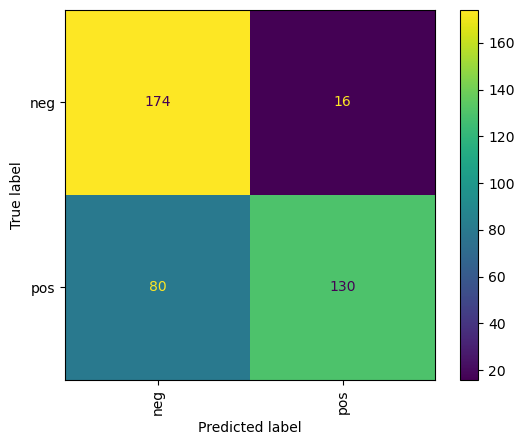

In [57]:
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred, labels=movie.target_names)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

## Qualitative analysis

In [61]:
# sample some of the predictions against the ground truths 
for idx, (article, prediction, truth) in enumerate(zip(docs_test[:10], y_pred[:10], y_test[:10])):
    print(f"---------------------------Movie Review {idx}---------------------------")
    print(article) 
    print(f"\n\nClassifications {prediction} and real label is {truth}")
    print("---------------------------\n\n")

---------------------------Movie Review 0---------------------------
b"apollo 13 is simply one of the most dramatic film this summer ( apart from swashbuckling braveheart ) . \ndirector ( and former actor ) ron howard ( splash , backdraft , far & away ) , most noted for his dramatic film making , displays again his brilliance in creating drama and suspense in apollo 13 . \nbeing the second largest box office hit in the us this summer ( with more than us$150 million in the states alone ) , this film is his most successful effort yet . \nperhaps one of the most appealing feature of this film is the pool of talented actors such as tom hanks ( gump himself ) , kevin bacon ( footloose , tremors , a few good men etc . ) , gary sinise ( forrest gump ) , bill paxton ( aliens , true lies , boxing helena ) and ed harris ( the abyss , just cause ) . . \nall of whom gave good performances in their respective roles . \napollo 13 was the second worst accident ever to occur in the history of us space